In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import match_template
#from skimage.transform import rescale
from skimage.color import rgb2gray
from skimage.draw import rectangle
from skimage.io import imread, imshow
from IPython.display import Image
from PIL import ImageDraw

In [3]:
image = imread('C:/Users/Asus/Desktop/IMG_20220105_140153.jpg')
image = rgb2gray(image)
template = image[1673:1985, 1150:1470]

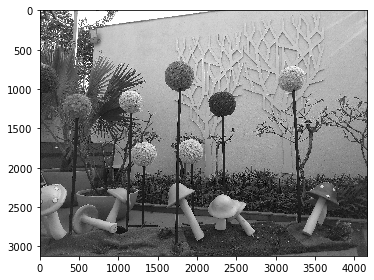

In [4]:
imshow(image)

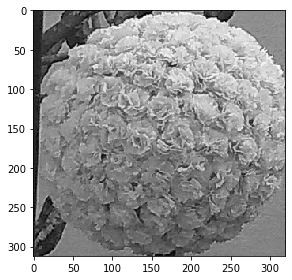

In [5]:
imshow(template)

In [6]:
result = match_template(image, template)
print(result)

[[ 0.13419448  0.13557391  0.13792178 ... -0.08681444 -0.0849789
  -0.08154885]
 [ 0.13192589  0.1323525   0.1330099  ... -0.08753375 -0.08394301
  -0.08012074]
 [ 0.12871417  0.12920621  0.12887955 ... -0.08620604 -0.08209676
  -0.07835063]
 ...
 [ 0.17979384  0.18065195  0.18118528 ... -0.03341542 -0.02882403
  -0.02562523]
 [ 0.17384287  0.17468642  0.17535454 ... -0.03512632 -0.03105066
  -0.02792289]
 [ 0.1673062   0.16840294  0.16908103 ... -0.03801254 -0.03387975
  -0.03003271]]


In [7]:
result.shape

(2809, 3841)

In [11]:
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

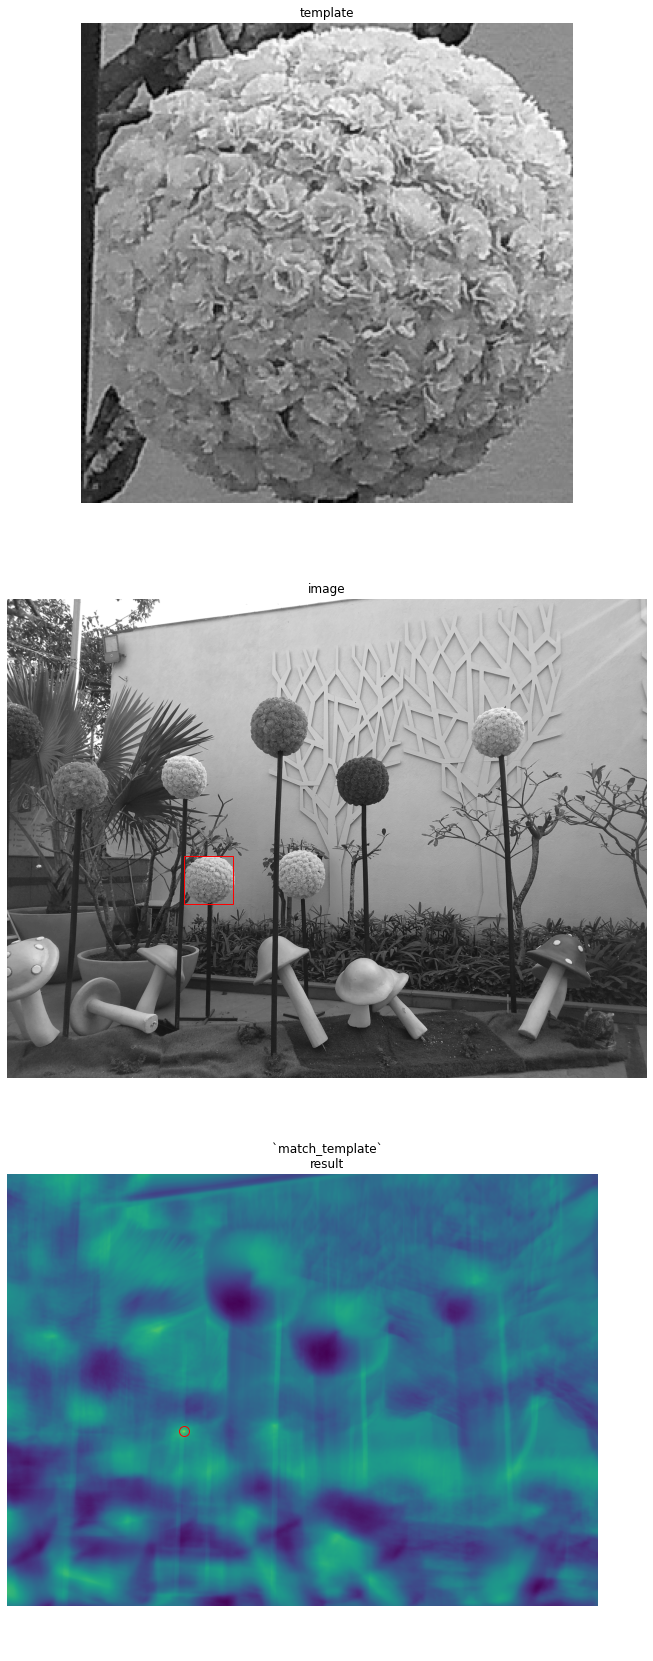

In [16]:
fig = plt.figure(figsize=(80, 30))
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [ ]:
# NEXT, MAKE IT FOR MULTIPLE OBJECT DETECTION AND ALSO ADD NOISE TO TEMPLATE AND MAKE IT BLURRED